# **_3 Pandas 모듈과 패키지_**
**금융데이터를 활용한 파이썬 기초**

언의의 내용과 개념을 있는 그대로 받아들이고 이해하려고 노력하자

<br>
## **1 Pandas  &nbsp;&nbsp; & &nbsp;&nbsp; Numpy**
- **numpy** : 엑셀의 내부 함수 모음 ( pandas의 메소드 함수역활)
- **pandas** : 엑셀의 단축키 , sheets 등 부가기능 모음
- 함께 뒤 섞여서 활용
<br>
</br><img src = "http://pbpython.com/images/pandas-dataframe-shadow.png" align="left" width='800'>

<br>
## **2 'Series'  in Pandas**

<br>
### **01 [ list ] 와 비교**

In [1]:
lists = [4,2,-1,1,-2,-3,4,5]
lists

[4, 2, -1, 1, -2, -3, 4, 5]

In [2]:
import pandas as pd
data = pd.Series(lists)
data

0    4
1    2
2   -1
3    1
4   -2
5   -3
6    4
7    5
dtype: int64

In [3]:
data.index

RangeIndex(start=0, stop=8, step=1)

In [4]:
data.values

array([ 4,  2, -1,  1, -2, -3,  4,  5])

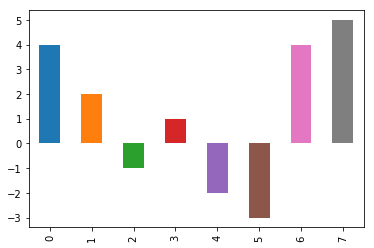

In [5]:
%matplotlib inline
data.plot(kind='bar')

<br>
### ** 02 { dict } 와 비교**

In [6]:
dict_data = {'seoul':4, 'daejeon':7, 'daegu':-5, 'busan':3}
pd.Series(dict_data)

seoul      4
daejeon    7
daegu     -5
busan      3
dtype: int64

In [7]:
data = pd.Series([4, 7, -5, 3], 
                 index = ['seoul', 'daejeon', 'daegu','busan'])
data

seoul      4
daejeon    7
daegu     -5
busan      3
dtype: int64

In [8]:
data.index

Index(['seoul', 'daejeon', 'daegu', 'busan'], dtype='object')

In [9]:
data['seoul']

4

<br>
### **03 Series 의 함수적 속성**

In [10]:
data * 2

seoul       8
daejeon    14
daegu     -10
busan       6
dtype: int64

In [11]:
data [ data > 5 ]

daejeon    7
dtype: int64

In [12]:
data.isnull()

seoul      False
daejeon    False
daegu      False
busan      False
dtype: bool

In [13]:
data2 = pd.Series([-4, 3, -5], 
                  index = ['daejeon', 'daegu','busan'])
data + data2

busan     -2.0
daegu     -2.0
daejeon    3.0
seoul      NaN
dtype: float64

In [14]:
data2.index = [1,2,3]
data2

1   -4
2    3
3   -5
dtype: int64

<br>
## **3 'DataFrame'  in Pandas** 
<br><br></br>
### **01 Table 생성**

In [15]:
import pandas as pd
pd.DataFrame(data)

0
seoul    4
daejeon  7
daegu   -5
busan    3

In [16]:
data3 = [10,9,8,7,6,5,7]
df = pd.DataFrame( {'first_col' : data, 
                    'second_col': data2, 
                    'third_col' : data3} )
df

/home/markbaum/Python/python/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


first_col  second_col  third_col
seoul          4.0         NaN         10
daejeon        7.0         NaN          9
daegu         -5.0         NaN          8
busan          3.0         NaN          7
1              NaN        -4.0          6
2              NaN         3.0          5
3              NaN        -5.0          7

<br>
### **02 Index**

In [17]:
df = df.reset_index()
df

index  first_col  second_col  third_col
0    seoul        4.0         NaN         10
1  daejeon        7.0         NaN          9
2    daegu       -5.0         NaN          8
3    busan        3.0         NaN          7
4        1        NaN        -4.0          6
5        2        NaN         3.0          5
6        3        NaN        -5.0          7

In [18]:
df = df.rename(columns={'index':'city'})
df

city  first_col  second_col  third_col
0    seoul        4.0         NaN         10
1  daejeon        7.0         NaN          9
2    daegu       -5.0         NaN          8
3    busan        3.0         NaN          7
4        1        NaN        -4.0          6
5        2        NaN         3.0          5
6        3        NaN        -5.0          7

In [19]:
df = df.set_index('city')
df

first_col  second_col  third_col
city                                     
seoul          4.0         NaN         10
daejeon        7.0         NaN          9
daegu         -5.0         NaN          8
busan          3.0         NaN          7
1              NaN        -4.0          6
2              NaN         3.0          5
3              NaN        -5.0          7

In [20]:
df.drop('busan', axis = 0)

first_col  second_col  third_col
city                                     
seoul          4.0         NaN         10
daejeon        7.0         NaN          9
daegu         -5.0         NaN          8
1              NaN        -4.0          6
2              NaN         3.0          5
3              NaN        -5.0          7

In [21]:
df_index    = df.index.tolist()
df_index[4] = 'Jeju'
df_index

['seoul', 'daejeon', 'daegu', 'busan', 'Jeju', 2, 3]

In [22]:
df.index = df_index
df

first_col  second_col  third_col
seoul          4.0         NaN         10
daejeon        7.0         NaN          9
daegu         -5.0         NaN          8
busan          3.0         NaN          7
Jeju           NaN        -4.0          6
2              NaN         3.0          5
3              NaN        -5.0          7

<br>
### **03 Columns**
DataFrame 의 Columns 바꾸기 및 재정렬

In [23]:
df.second_col['daegu'] = 7
df

/home/markbaum/Python/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


first_col  second_col  third_col
seoul          4.0         NaN         10
daejeon        7.0         NaN          9
daegu         -5.0         7.0          8
busan          3.0         NaN          7
Jeju           NaN        -4.0          6
2              NaN         3.0          5
3              NaN        -5.0          7

In [24]:
df = df.reset_index()
df.rename(columns={ 'level_0'   : '도시명',
                   'first_col'  : '보건소',
                   'second_col' : '경찰서', 
                   'third_col'  : '도서관'})

index  보건소  경찰서  도서관
0    seoul  4.0  NaN   10
1  daejeon  7.0  NaN    9
2    daegu -5.0  7.0    8
3    busan  3.0  NaN    7
4     Jeju  NaN -4.0    6
5        2  NaN  3.0    5
6        3  NaN -5.0    7

In [25]:
rename = ['index', '도시명', 'index', '보건소', '경찰서', '도서관']
result = {}
{ col : rename[no]     for no, col in enumerate(df.columns)}

{'index': 'index',
 'first_col': '도시명',
 'second_col': 'index',
 'third_col': '보건소'}

In [26]:
df.rename(columns = result)

index  first_col  second_col  third_col
0    seoul        4.0         NaN         10
1  daejeon        7.0         NaN          9
2    daegu       -5.0         7.0          8
3    busan        3.0         NaN          7
4     Jeju        NaN        -4.0          6
5        2        NaN         3.0          5
6        3        NaN        -5.0          7

In [27]:
df['Year'] = '2018'
df

index  first_col  second_col  third_col  Year
0    seoul        4.0         NaN         10  2018
1  daejeon        7.0         NaN          9  2018
2    daegu       -5.0         7.0          8  2018
3    busan        3.0         NaN          7  2018
4     Jeju        NaN        -4.0          6  2018
5        2        NaN         3.0          5  2018
6        3        NaN        -5.0          7  2018

In [28]:
df = df.drop('Year', axis = 1)
df

index  first_col  second_col  third_col
0    seoul        4.0         NaN         10
1  daejeon        7.0         NaN          9
2    daegu       -5.0         7.0          8
3    busan        3.0         NaN          7
4     Jeju        NaN        -4.0          6
5        2        NaN         3.0          5
6        3        NaN        -5.0          7

In [29]:
df.insert(0, 'Year', '2018')
df

Year    index  first_col  second_col  third_col
0  2018    seoul        4.0         NaN         10
1  2018  daejeon        7.0         NaN          9
2  2018    daegu       -5.0         7.0          8
3  2018    busan        3.0         NaN          7
4  2018     Jeju        NaN        -4.0          6
5  2018        2        NaN         3.0          5
6  2018        3        NaN        -5.0          7

In [30]:
df.insert(1,'month', '04')
df

Year month    index  first_col  second_col  third_col
0  2018    04    seoul        4.0         NaN         10
1  2018    04  daejeon        7.0         NaN          9
2  2018    04    daegu       -5.0         7.0          8
3  2018    04    busan        3.0         NaN          7
4  2018    04     Jeju        NaN        -4.0          6
5  2018    04        2        NaN         3.0          5
6  2018    04        3        NaN        -5.0          7

<br>
### **04 Sorting**

In [31]:
df.sort_index(axis = 0, ascending=False)

Year month    index  first_col  second_col  third_col
6  2018    04        3        NaN        -5.0          7
5  2018    04        2        NaN         3.0          5
4  2018    04     Jeju        NaN        -4.0          6
3  2018    04    busan        3.0         NaN          7
2  2018    04    daegu       -5.0         7.0          8
1  2018    04  daejeon        7.0         NaN          9
0  2018    04    seoul        4.0         NaN         10

In [32]:
df.sort_values(by='third_col')

Year month    index  first_col  second_col  third_col
5  2018    04        2        NaN         3.0          5
4  2018    04     Jeju        NaN        -4.0          6
3  2018    04    busan        3.0         NaN          7
6  2018    04        3        NaN        -5.0          7
2  2018    04    daegu       -5.0         7.0          8
1  2018    04  daejeon        7.0         NaN          9
0  2018    04    seoul        4.0         NaN         10

<br>
### **05 Series 를 활용한 시계열 데이터 다루기**

In [33]:
import pandas as pd
date_list = pd.date_range('2017-7-1','2017-7-7')
date_list

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07'],
              dtype='datetime64[ns]', freq='D')

In [34]:
[ str(date)  for date in date_list ]

['2017-07-01 00:00:00',
 '2017-07-02 00:00:00',
 '2017-07-03 00:00:00',
 '2017-07-04 00:00:00',
 '2017-07-05 00:00:00',
 '2017-07-06 00:00:00',
 '2017-07-07 00:00:00']

In [35]:
[ ts.date() for ts in date_list ]

[datetime.date(2017, 7, 1),
 datetime.date(2017, 7, 2),
 datetime.date(2017, 7, 3),
 datetime.date(2017, 7, 4),
 datetime.date(2017, 7, 5),
 datetime.date(2017, 7, 6),
 datetime.date(2017, 7, 7)]

In [36]:
date_list = [ str(ts.date()) for ts in date_list ]
date_list

['2017-07-01',
 '2017-07-02',
 '2017-07-03',
 '2017-07-04',
 '2017-07-05',
 '2017-07-06',
 '2017-07-07']

In [37]:
df.insert(0,'Date',date_list)
df

Date  Year month    index  first_col  second_col  third_col
0  2017-07-01  2018    04    seoul        4.0         NaN         10
1  2017-07-02  2018    04  daejeon        7.0         NaN          9
2  2017-07-03  2018    04    daegu       -5.0         7.0          8
3  2017-07-04  2018    04    busan        3.0         NaN          7
4  2017-07-05  2018    04     Jeju        NaN        -4.0          6
5  2017-07-06  2018    04        2        NaN         3.0          5
6  2017-07-07  2018    04        3        NaN        -5.0          7

In [38]:
pd.DataFrame({'Data':[1,2,3,4,5],
             'Qusetion':['A','B','C','D','E'],
             'Answer':['X', 'Y', 'Z','Q','P']})

Data Qusetion Answer
0     1        A      X
1     2        B      Y
2     3        C      Z
3     4        D      Q
4     5        E      P

<br>
## **4 Numpy  &nbsp; with &nbsp; pandas Series & DataFrame**
<br>
### **01 ndarray : 다차원 array**

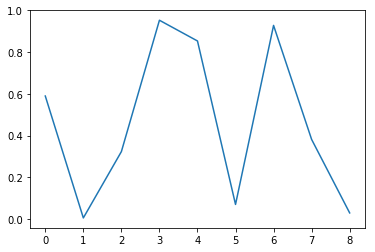

In [39]:
import pandas as pd
import numpy as np

data = np.random.rand(9)
data = pd.Series(data)
data.plot()

In [40]:
ndarray_data = np.random.rand(30).reshape(6,5)
print(type(ndarray_data), '\n', ndarray_data)

<class 'numpy.ndarray'> 
 [[0.19672903 0.55808166 0.99272234 0.82994518 0.76176125]
 [0.24616813 0.931543   0.43026492 0.96742879 0.91991022]
 [0.36422249 0.64622613 0.14469511 0.09097105 0.42418434]
 [0.360457   0.34528676 0.84945906 0.77877459 0.77683491]
 [0.1581022  0.29709928 0.64079891 0.80899627 0.13257151]
 [0.24023263 0.69877958 0.34796698 0.37299849 0.12560324]]


In [41]:
df = pd.DataFrame(ndarray_data,
             columns=['Kospi','Kosdq','MSFT','Nasdaq','China'],
             index = ['2012','2013','2014','2015','2016','2017'])
df

Kospi     Kosdq      MSFT    Nasdaq     China
2012  0.196729  0.558082  0.992722  0.829945  0.761761
2013  0.246168  0.931543  0.430265  0.967429  0.919910
2014  0.364222  0.646226  0.144695  0.090971  0.424184
2015  0.360457  0.345287  0.849459  0.778775  0.776835
2016  0.158102  0.297099  0.640799  0.808996  0.132572
2017  0.240233  0.698780  0.347967  0.372998  0.125603

In [42]:
df.columns

Index(['Kospi', 'Kosdq', 'MSFT', 'Nasdaq', 'China'], dtype='object')

In [43]:
df.columns.tolist()

['Kospi', 'Kosdq', 'MSFT', 'Nasdaq', 'China']

In [44]:
df.index

Index(['2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')

In [45]:
df.index.tolist()

['2012', '2013', '2014', '2015', '2016', '2017']

<br>
### **02 DataFrame 의 컬럼 데이터 인덱싱**
DataFrame ==> **Series**

In [46]:
df.Kosdq

2012    0.558082
2013    0.931543
2014    0.646226
2015    0.345287
2016    0.297099
2017    0.698780
Name: Kosdq, dtype: float64

In [47]:
df['Kospi']

2012    0.196729
2013    0.246168
2014    0.364222
2015    0.360457
2016    0.158102
2017    0.240233
Name: Kospi, dtype: float64

<br>
### **03 DataFrame 의 Row 데이터 인덱싱**
DataFrame 부분 편집하기

In [48]:
df[:3]

Kospi     Kosdq      MSFT    Nasdaq     China
2012  0.196729  0.558082  0.992722  0.829945  0.761761
2013  0.246168  0.931543  0.430265  0.967429  0.919910
2014  0.364222  0.646226  0.144695  0.090971  0.424184

<br>
### **04 DataFrame 의 [Row : column]  데이터 인덱싱**

In [49]:
df.iloc[ : , : ]

Kospi     Kosdq      MSFT    Nasdaq     China
2012  0.196729  0.558082  0.992722  0.829945  0.761761
2013  0.246168  0.931543  0.430265  0.967429  0.919910
2014  0.364222  0.646226  0.144695  0.090971  0.424184
2015  0.360457  0.345287  0.849459  0.778775  0.776835
2016  0.158102  0.297099  0.640799  0.808996  0.132572
2017  0.240233  0.698780  0.347967  0.372998  0.125603

In [50]:
df.iloc[:, :3]

Kospi     Kosdq      MSFT
2012  0.196729  0.558082  0.992722
2013  0.246168  0.931543  0.430265
2014  0.364222  0.646226  0.144695
2015  0.360457  0.345287  0.849459
2016  0.158102  0.297099  0.640799
2017  0.240233  0.698780  0.347967

In [51]:
df_sum = df.iloc[3:, :3]
df_sum

Kospi     Kosdq      MSFT
2015  0.360457  0.345287  0.849459
2016  0.158102  0.297099  0.640799
2017  0.240233  0.698780  0.347967